# Using Spacy

In [1]:
!pip install -U pip setuptools wheel
!python -m spacy download en_core_web_sm
!pip install spacy==3.7.5
!pip install scispacy
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [4]:
# load headache notes
from google.colab import files
uploaded = files.upload()

Saving notes_headache.txt to notes_headache.txt


In [5]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [6]:
df=notes

In [7]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['50 year old', '4 days ago', 'Tylenol', 'the day', 'night'], ['23', 'Lupus', 'ESRD', 'RUE', 'HA', 'BP', 'un', '1131', 'BP', '10-20', 'BP', 'BP', 'this past Friday', 'BP 130/70', 'today', 'GU/GI', 'ED'], ['62yo', 'Afib', 'CAD', 's/p PTCA x', '2', '2178', 'USOH', 'today', 'half an hour later', '911', 'ICH', 'INR', '2.89', 'FFP', 'vit K 5', 'IM', '10', '1', '1'], ['49 year old', 'RV enlargement', 'ASD', 'CHF', 'the past one year', '1016', '11-25', 'TTE', 'ASD', '121', '6', 'CHF'], ['83 year old', 'this morning', '7:45 PM', 'the day', '2171-9-25', '18'], ['72 year old', 'CAD', 'CKD', 'IV', 'ED', '2 minute', 'EMS', '11:28 am', 'this morning', 'SOB', '240/120', '124', '24', '100%', 'RA', '330', 'x3', '18', '328', '12:20 pm', 'ED', 'ED', 'Code Stroke', 'One minute', '2', 'IV', '2 minutes'], ['46 yo female', 'PCP', '151', '2 weeks', 'two weeks', 'SOB', 'two', 'PCP', 'CT', '13x8 cm', 'SVC', '18', 'NI', '499'], ['17 year old', 'RH', 'several years', 'junvenile', 'MICU', 'UTI', '2 weeks'], ['82

The vectors generated by Word2Vec, as implemented by the Gensim library, are specific to the corpus used for training. Word2Vec learns word embeddings by analyzing the patterns of word co-occurrence within the given training corpus. As a result, the learned word vectors capture the semantics and relationships of words as they appear in that particular corpus.

In other words, the word embeddings produced by Word2Vec are not universal but are context-dependent. They represent how words are related to each other within the specific textual data provided during training. Therefore, if you train a Word2Vec model on one corpus and then train another model on a different corpus, the word vectors learned by each model may differ because they reflect the linguistic patterns and context of their respective training data.

To create word vectors that are more general and applicable across different contexts, larger and more diverse training corpora are often used. Pretrained Word2Vec models, such as those trained on massive text datasets like Wikipedia or news articles, offer word vectors that are more general and can be used as a starting point for various natural language processing tasks. These pretrained embeddings capture a broad range of linguistic knowledge from diverse sources, making them useful in many applications.

In summary, Word2Vec word vectors are specific to the training corpus but can be made more universal by training on larger and more diverse datasets or by using pretrained embeddings.

In [8]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)

In [9]:
model1.wv['Tylenol']

array([ 2.2280014e-03, -7.5307940e-03,  5.6334310e-03, -4.9998071e-03,
       -3.2782922e-03, -1.8524420e-03,  8.2362248e-03,  2.2637236e-03,
       -9.1682904e-04, -2.8618763e-03, -2.1154734e-03, -1.2959107e-03,
       -5.0855489e-03, -4.1242773e-03,  1.8506558e-04,  4.5581539e-03,
        1.7979734e-03,  6.9067972e-03,  6.3440361e-04, -3.2354677e-03,
       -7.3793335e-03,  6.0133711e-03,  6.9576735e-03, -6.0715228e-03,
        4.6829730e-03,  9.5087066e-03, -6.3870335e-03, -2.8860599e-03,
       -9.1016497e-03,  3.2240967e-03, -3.4287400e-03,  2.0478356e-03,
        9.4535705e-03, -8.3664870e-03, -9.3198838e-03,  1.7298952e-03,
       -8.0403714e-03, -9.0775080e-03, -9.3498277e-03, -3.1204196e-04,
       -1.0937809e-03,  7.3880685e-04, -1.3466588e-03,  9.0409704e-03,
        8.7921619e-03, -6.3635968e-03,  8.6933635e-03, -9.0404600e-03,
       -1.3362445e-03,  2.5428974e-03, -1.1514806e-04, -3.8106241e-03,
        4.7529809e-04,  1.0005404e-03, -9.4052171e-03, -4.8753535e-03,
      

In [10]:
model1.wv.similar_by_word('Tylenol') #please read the below note for explaination of following output

[('2', 0.3490501344203949),
 ('62yo', 0.2652985751628876),
 ('PCP', 0.24822549521923065),
 ('Azithromycin', 0.23838402330875397),
 ('46 yo female', 0.23170660436153412),
 ('s/p PTCA x', 0.2292184978723526),
 ('17 year old', 0.22039134800434113),
 ('Down', 0.21607479453086853),
 ('1', 0.20441719889640808),
 ('100%', 0.1698361039161682)]

The output shows words that are not semantically similar to "Tylenol." This can happen if the training data used to train the Word2Vec model does not contain enough context or examples of the word "Tylenol" and its related terms, or if the model's parameters (such as min_count) are not set appropriately.

In this case since Tylenol appears only once in the entire corpus, min_count has to be set to 1. (The model ignores all words that appear less than min_count times)

This comes at a cost, means that even very infrequent words are included in the vocabulary. This can lead to noisy word embeddings for rare words.

In [11]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


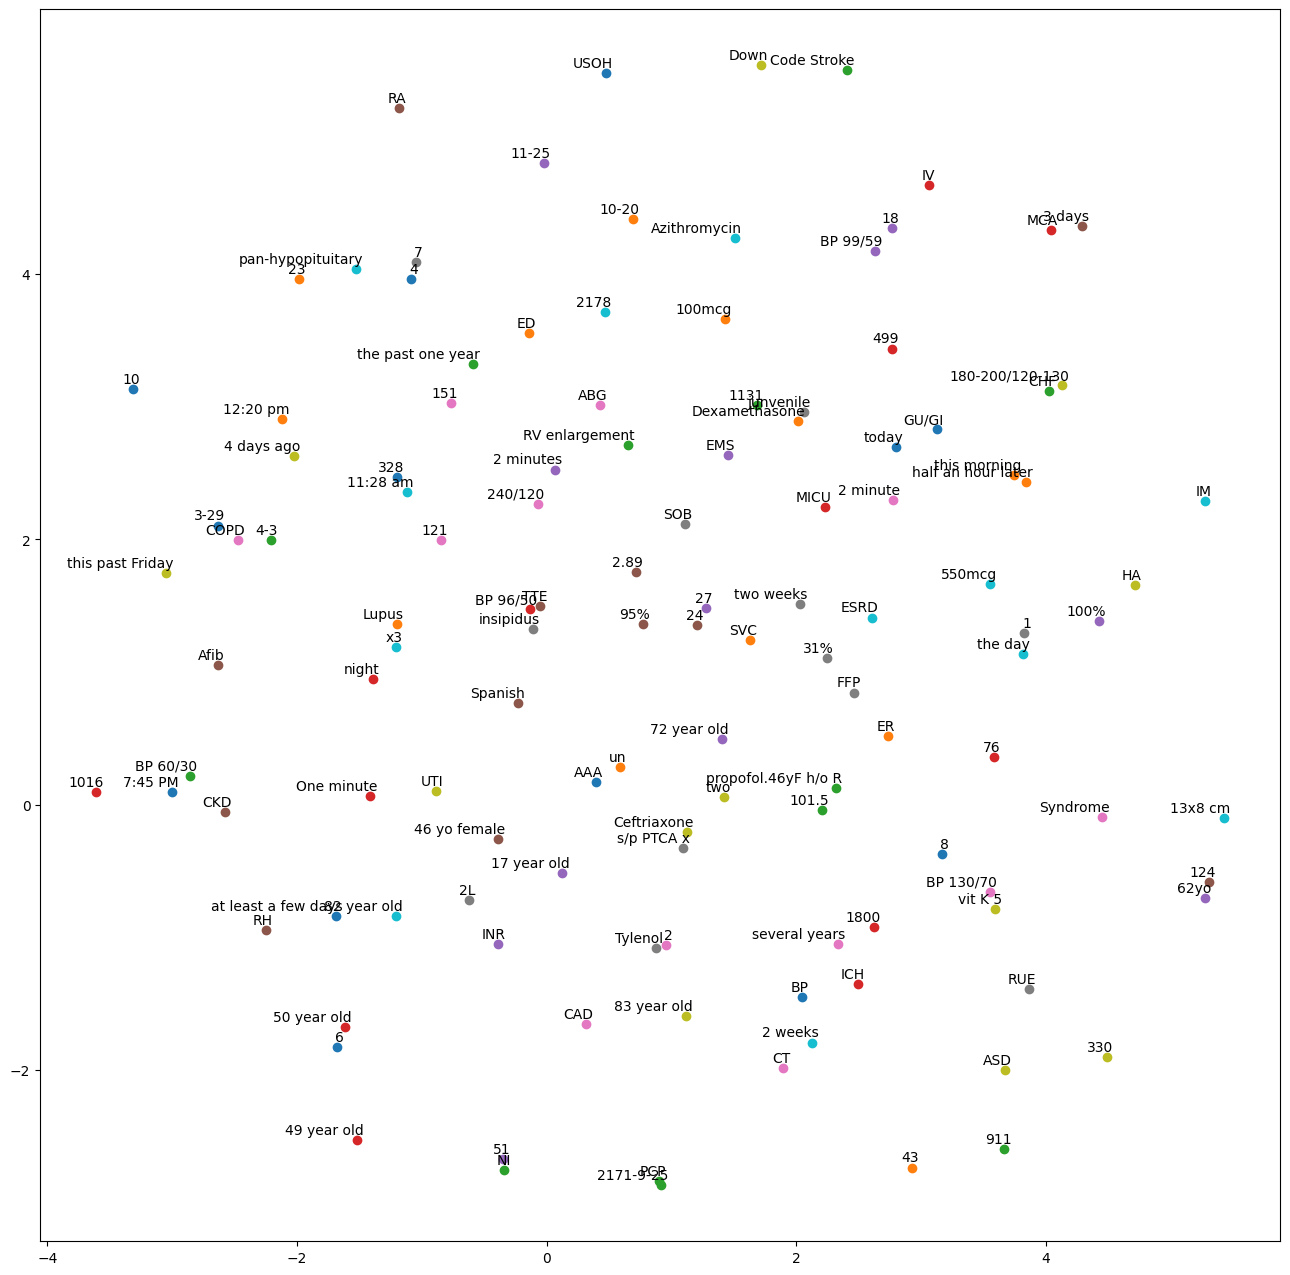

In [12]:
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

In [13]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

[==================================================] 100.0% 66.0/66.0MB downloaded


In [14]:
# queen = (king - man) + woman
result=pretrained_model.most_similar(positive=['woman','king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523604273796082)]


In [15]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957463502883911),
 ('fatigue', 0.8547418117523193),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088536262512207),
 ('nausea', 0.8022516369819641),
 ('discomfort', 0.789000391960144),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692658305168152),
 ('symptom', 0.7564830183982849),
 ('migraine', 0.7536172866821289)]

In [16]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

BP
ED
CHF
MICU
3 days
ASD
2 weeks
this morning
PCP
IV
EMS
RA
CAD
SOB
HA
the day
Lupus
the past one year
TTE
RUE
83 year old
ESRD
GU/GI
2171-9-25
72 year old
CKD
2 minute
Tylenol
4 days ago
11:28 am
7:45 PM
RV enlargement
49 year old
62yo
Afib
BP 130/70
s/p PTCA x
this past Friday
2178
USOH
half an hour later
ICH
INR
240/120
FFP
vit K 5
IM
BP 96/50
100%
Syndrome
180-200/120-130
550mcg
100mcg
propofol.46yF h/o R
MCA
Spanish
COPD
Down
pan-hypopituitary
ER
BP 99/59
95%
ABG
31%
Ceftriaxone
Azithromycin
Dexamethasone
BP 60/30
CT
2L
12:20 pm
Code Stroke
One minute
2 minutes
46 yo female
two weeks
13x8 cm
at least a few days
SVC
NI
17 year old
RH
several years
junvenile
UTI
82 year old
AAA
50 year old


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


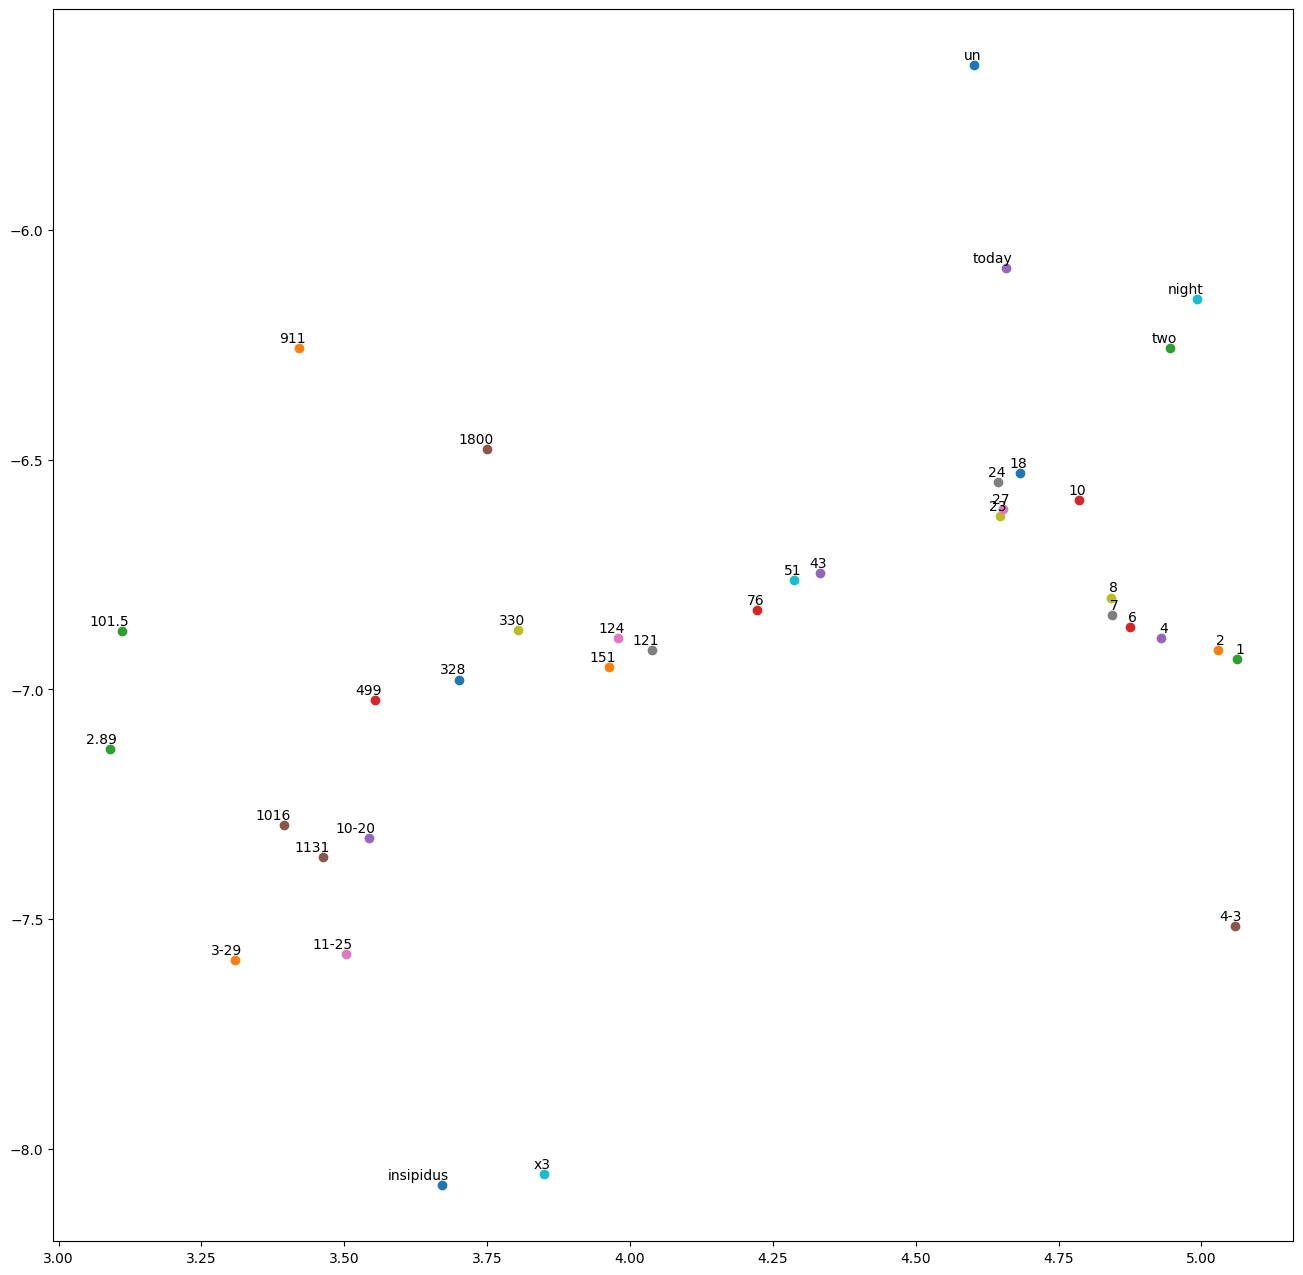

In [17]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

# Using SciSpacy

In [18]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'en_ner_bc5cdr_md' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'en_ner_bc5cdr_md'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787714 sha256=5134394446e47a5843912e3365afdc8136adab466f549acd8613bf71096c8eb7
  Stored in directory: /root/.cache/pip/wheels/6e/a6/d6/bd15a41e2ff02a62f0a0a48dddbc07d048307db7199a1538f7
Successfully built en_ner_bc5cdr_md


In [19]:
import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.11/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [20]:
# load headache notes
from google.colab import files
uploaded = files.upload()

Saving notes_headache.txt to notes_headache (1).txt


In [21]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [22]:
df=notes

In [23]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['headache', 'Tylenol', 'pain', 'dizziness', 'nausea or vomiting'], ['ESRD', 'HD', 'PD', 'hypertension', 'VTE', 'swelling', 'hypertensive', 'nausea', 'nausea and vomiting yellow/green liquid', 'CP', 'shortness of breath', 'pain', 'swelling', 'dizziness', 'numbness', 'UA'], ['HTN', 'coumadin', 'CAD', 'right-sided headache', 'photophobia', 'nausea', 'numb', 'stroke', 'ICH', 'vit K', 'labetalol', 'dilantin', 'hypotension'], ['lupus, pulmonary hypertension', 'RV enlargement', 'CHF/pulm HTN', 'dyspnea', 'dyspnea', 'dyspneic', 'pulmonary hypertension', 'dilated right ventricle and R to L shunting c/w an ASD/PFO.', 'CHF'], ['aphasia', 'stroke'], ['CAD', 'hypertension', 'DM2', 'hyperlipidemia', 'CKD', 'aphasia', 'seizure', 'nystagmus', 'shakiness', 'diaphoresis', 'chest pain', 'SOB', 'nausea/vomiting', 'cough', 'FSBG', 'FSBG', 'rigors', 'Stroke', 'seizure', 'nystagmus', 'tremor', 'clonic movements', 'bowel/bladder incontinence', 'Ativan', 'seizure', 'seizure', 'stroke'], ['PCP', 'dyspnea', 'i

In [24]:
!pip install gensim

In [25]:
import gensim

In [26]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
model2 = word2vec.Word2Vec(corpus, min_count=1)

In [28]:
model2.wv['Tylenol']

array([-2.3349254e-04,  4.2242692e-03,  2.1137628e-03,  9.9952389e-03,
        6.2982936e-04, -5.4641385e-03, -1.1815703e-03,  2.0749792e-03,
       -3.3738047e-03, -7.8512654e-03, -5.5990652e-03, -6.7535131e-03,
        6.3534342e-03,  3.9250413e-03,  8.2194516e-03,  6.5153833e-03,
       -6.1294893e-03,  2.7146952e-03,  8.4728291e-03,  1.5962149e-03,
        3.0663186e-03,  5.8123916e-03, -8.8409511e-03,  9.1215130e-03,
        6.8220762e-03,  8.5087968e-03, -8.2271183e-03,  6.1744554e-03,
        6.6253212e-03, -1.3579562e-03, -6.2951529e-03,  5.3196419e-03,
       -6.8598809e-03, -5.3271609e-03,  3.5113178e-03,  8.0816802e-03,
        8.6925458e-03, -4.4024703e-03, -9.1888467e-03,  9.6064713e-03,
        6.2864353e-03, -3.9659874e-03, -8.4611485e-03, -4.7200234e-03,
       -3.9557521e-03, -3.2701669e-03,  8.1917230e-04, -2.9475740e-04,
       -3.1148393e-03, -5.9915497e-03,  9.4174622e-03, -4.7275312e-03,
       -7.2632353e-03,  7.6849740e-03,  2.5178185e-03,  8.6250249e-03,
      

In [29]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

Skipping 'dyspnea' as it is not present in the model's vocabulary.
Skipping 'headache' as it is not present in the model's vocabulary.
Skipping 'seizure' as it is not present in the model's vocabulary.
Skipping 'pain' as it is not present in the model's vocabulary.
Skipping 'aphasia' as it is not present in the model's vocabulary.
Skipping 'stroke' as it is not present in the model's vocabulary.
Skipping 'fentanyl' as it is not present in the model's vocabulary.
Skipping 'FSBG' as it is not present in the model's vocabulary.
Skipping 'abdominal pain' as it is not present in the model's vocabulary.
Skipping 'Name9' as it is not present in the model's vocabulary.
Skipping 'hypotension' as it is not present in the model's vocabulary.
Skipping 'HTN' as it is not present in the model's vocabulary.
Skipping 'nystagmus' as it is not present in the model's vocabulary.
Skipping 'nausea' as it is not present in the model's vocabulary.
Skipping 'dizziness' as it is not present in the model's voca

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


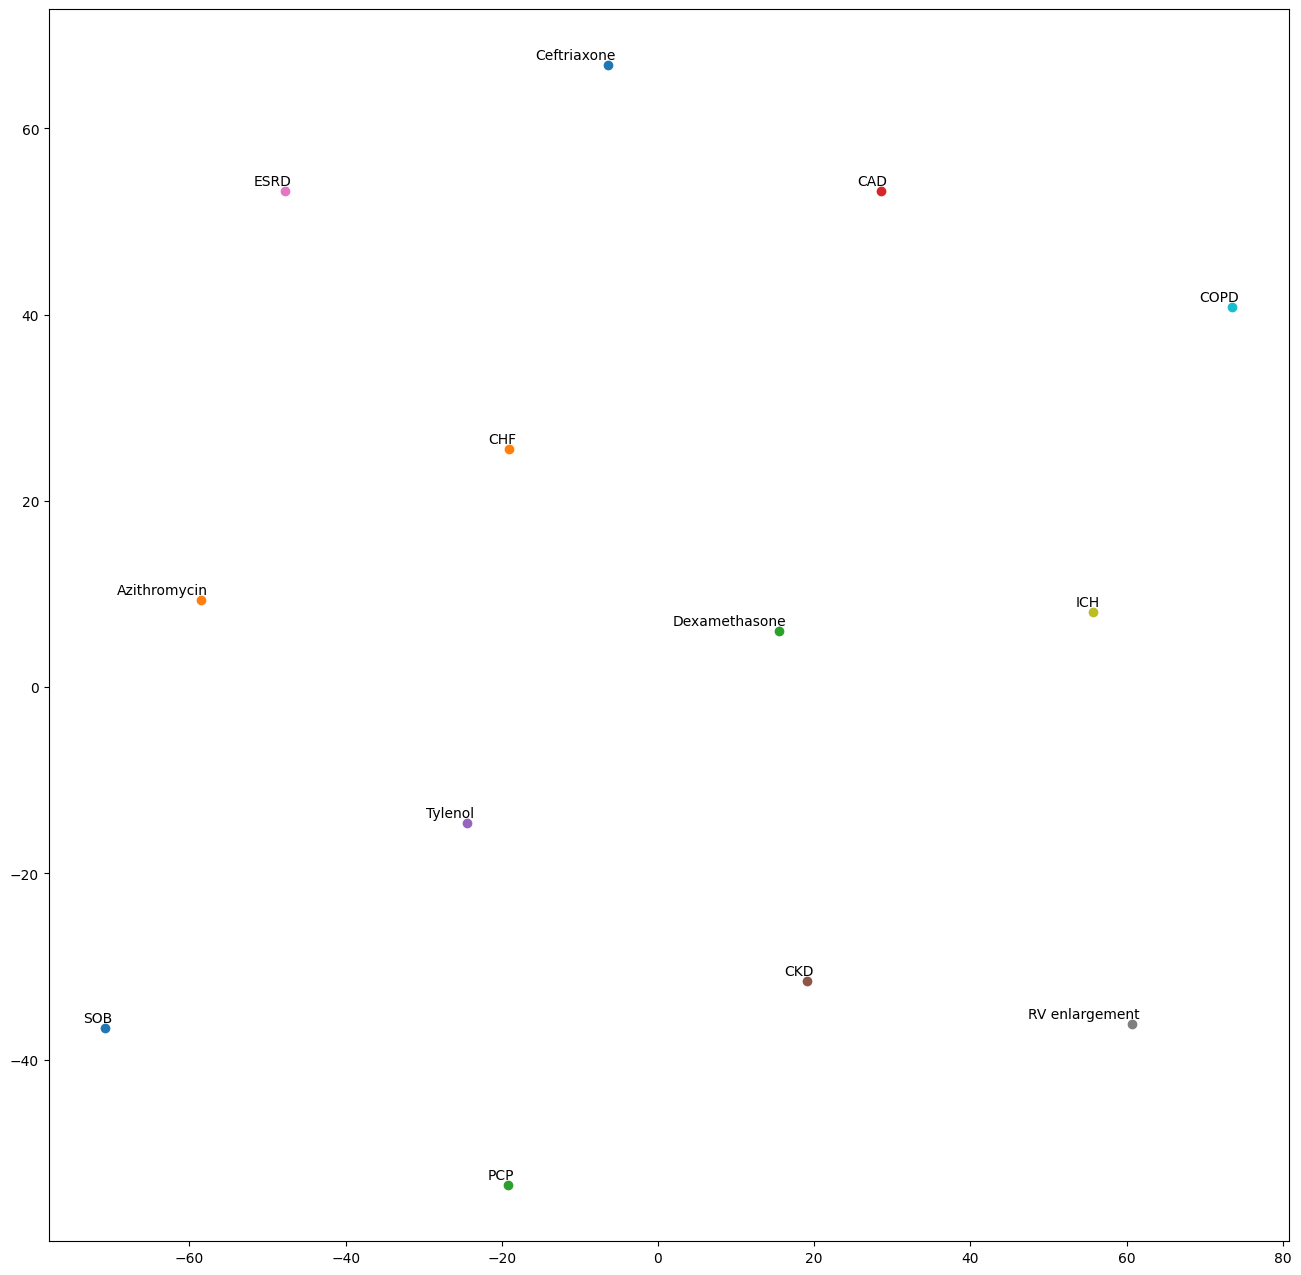

In [30]:
vocabs = model2.wv.index_to_key  # Access vocabulary using index_to_key
new_v = np.array(list(vocabs))
tsne_plot(model1, new_v)

In the above code snippet, a lot of words are skipped as the model was not trained. Hence a pretrained model will work better than the above model

In [ ]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

In [31]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957463502883911),
 ('fatigue', 0.8547418117523193),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088536262512207),
 ('nausea', 0.8022516369819641),
 ('discomfort', 0.789000391960144),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692658305168152),
 ('symptom', 0.7564830183982849),
 ('migraine', 0.7536172866821289)]

In [32]:
new_corpus_in_pretrained_model = []
for word in new_v:
    if word in pretrained_model.key_to_index:
        new_corpus_in_pretrained_model.append(word)
    else:
        print(word)  # Print out-of-vocabulary words


SOB
FSBG
CHF
PCP
abdominal pain
Name9
CAD
HTN
shortness of breath
Tylenol
CKD
nausea or vomiting
DM2
VTE
ESRD
HD
dilated right ventricle and R to L shunting c/w an ASD/PFO.
pulmonary hypertension
PD
dyspneic
RV enlargement
CHF/pulm HTN
UA
lupus, pulmonary hypertension
labetalol
vit K
ICH
right-sided headache
nausea and vomiting yellow/green liquid
CP
hypertensive headache
spiriva
MCA aneurysm
R sided defecits
R hemiparesis
COPD
OSA
diabetes insipidus
Down's Syndrome
hypothyroid
fever headache
Ceftriaxone
Azithromycin
AAA s/p repair
chest pain
Dexamethasone
Stroke
clonic movements
bowel/bladder incontinence
Ativan
incresing shortness of breath
nausea,
weight loss
pleural effusion
PANDAS s/p strep infection
cognitive decline
junvenile rheumatoid arthritis
autoimmune diseases
nausea/vomiting


In [33]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model:
            tokens.append(model[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


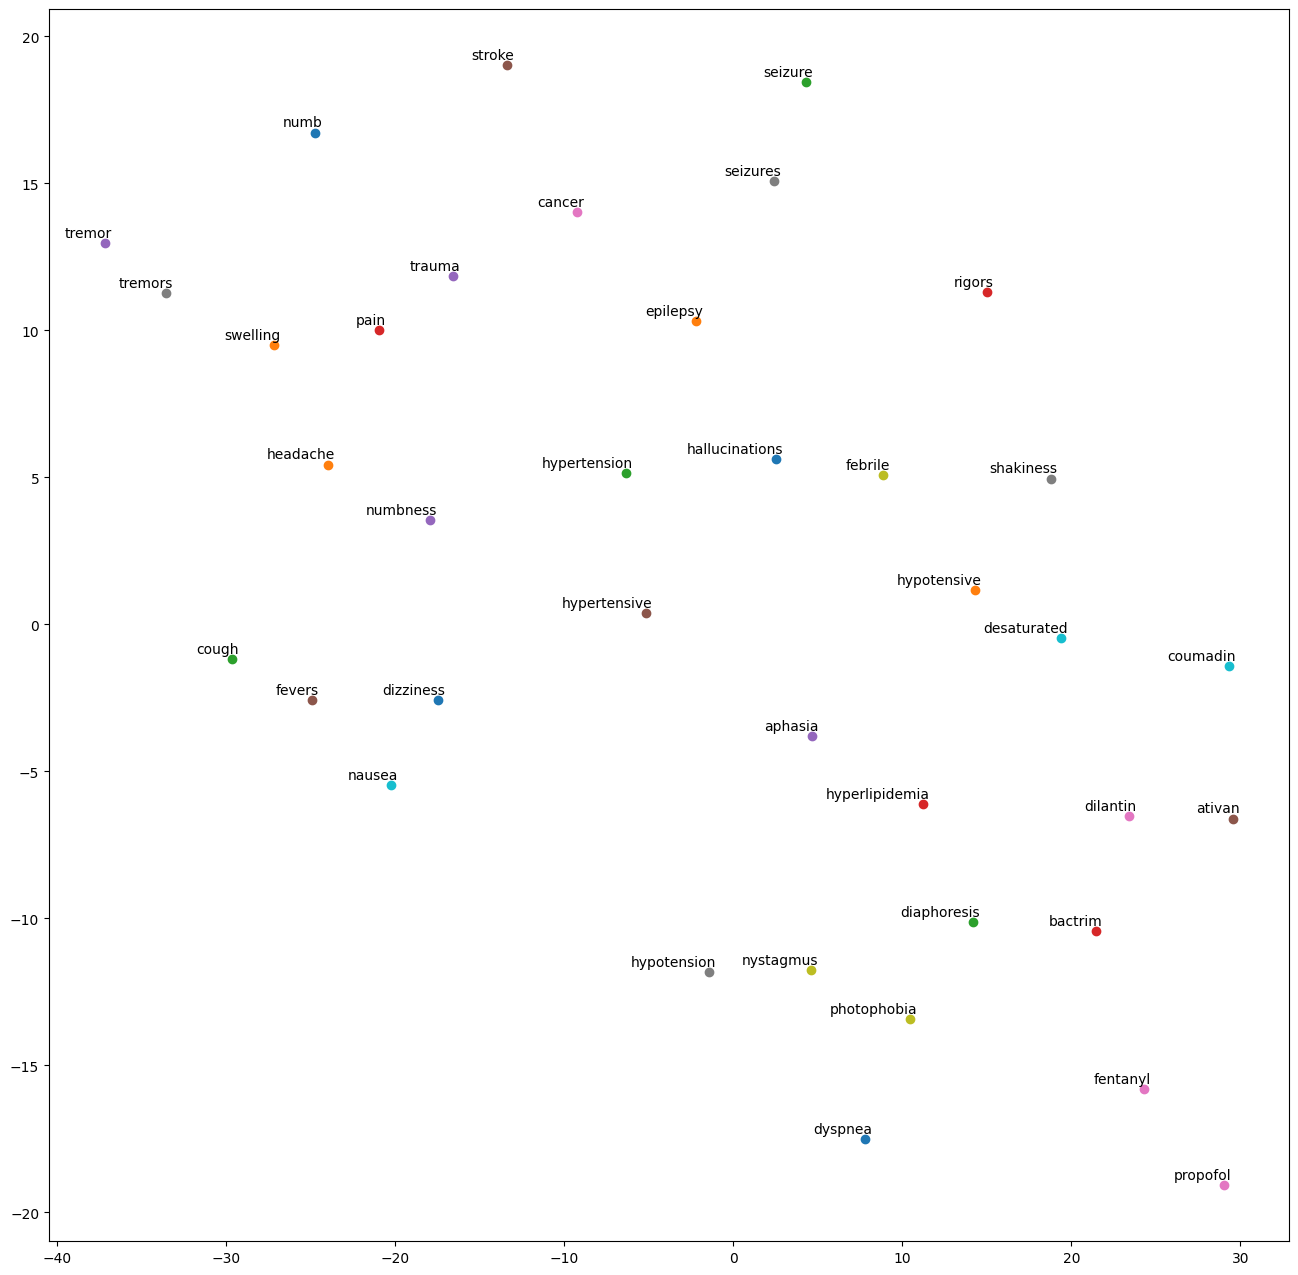

In [34]:
tsne_plot(pretrained_model,new_corpus_in_pretrained_model)